In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('airlines_flights_data.csv')
data.head()



,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
data[data["price"]=="5953"]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [10]:
data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [11]:
data['airline'].nunique()

6

In [12]:
data['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


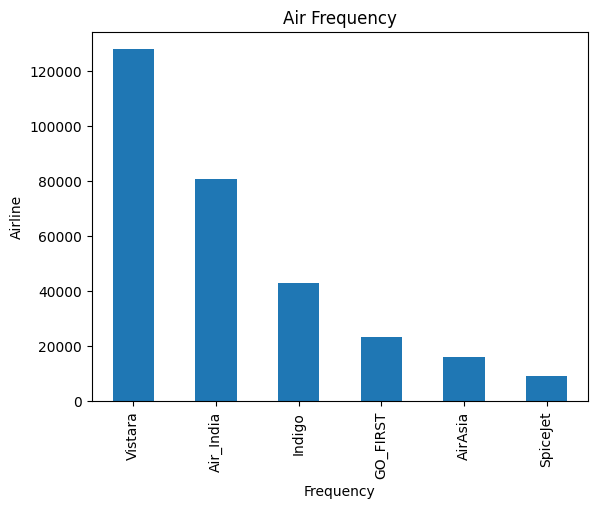

In [15]:
data['airline'].value_counts().plot(kind='bar')
plt.title("Air Frequency")
plt.xlabel("Airline")
plt.ylabel("Frequency")
plt.show()

In [16]:
# showing the departure time for the flights
data['departure_time'].value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [17]:
# showing the depaarrival rture time for the flights
data['arrival_time'].value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


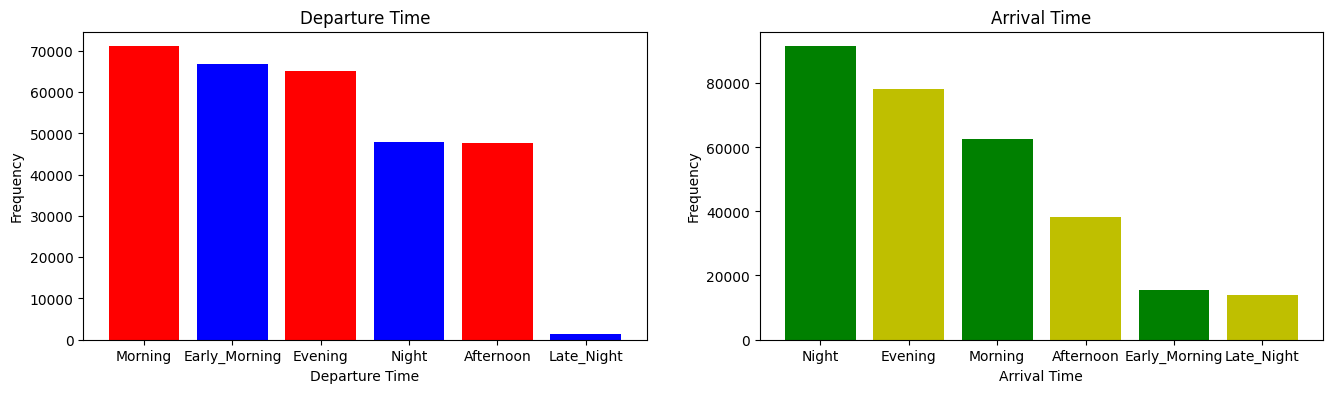

In [20]:
#showing the arrival and departure time for the flight
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.bar(data['departure_time'].value_counts().index,data['departure_time'].value_counts(),color=['r','b'])
plt.title("Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
plt.bar(data['arrival_time'].value_counts().index,data['arrival_time'].value_counts(),color=['g','y'])
plt.title("Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Frequency")
plt.show()


In [21]:
data['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [22]:
data.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


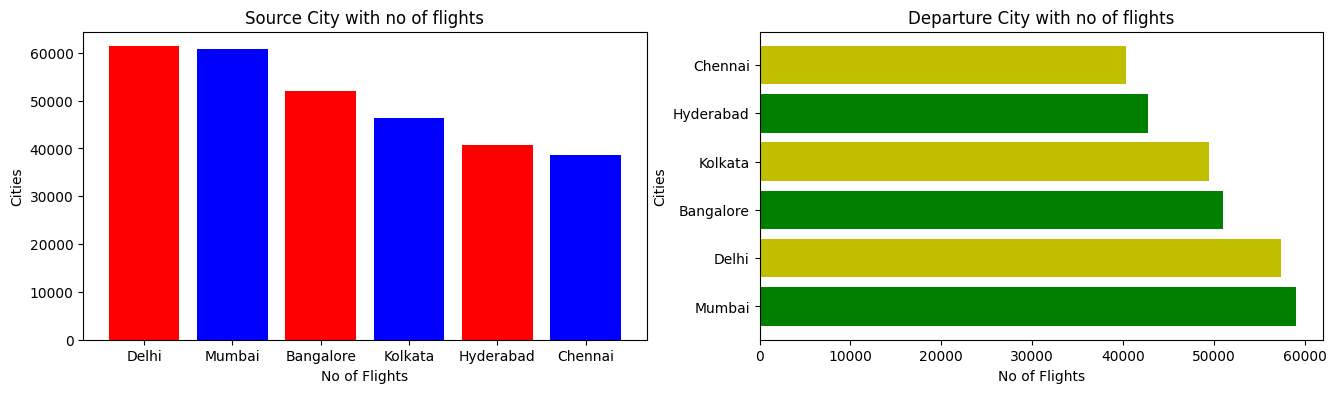

In [24]:
#showing the source_city and destination_city for the flights
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.bar(data['source_city'].value_counts().index,data['source_city'].value_counts(),color=['r','b'])
plt.title("Source City with no of flights")
plt.xlabel("No of Flights")
plt.ylabel("Cities")
plt.subplot(1,2,2)
plt.barh(data['destination_city'].value_counts().index,data['destination_city'].value_counts(),color=['g','y'])
plt.title("Departure City with no of flights")
plt.xlabel("No of Flights")
plt.ylabel("Cities")
plt.show()


In [25]:
# Grouping the Airlines and checking their mean price
data.groupby('airline')['price'].mean()

,price
airline,
AirAsia,4091.072742
Air_India,23507.019112
GO_FIRST,5652.007595
Indigo,5324.216303
SpiceJet,6179.278881
Vistara,30396.536302


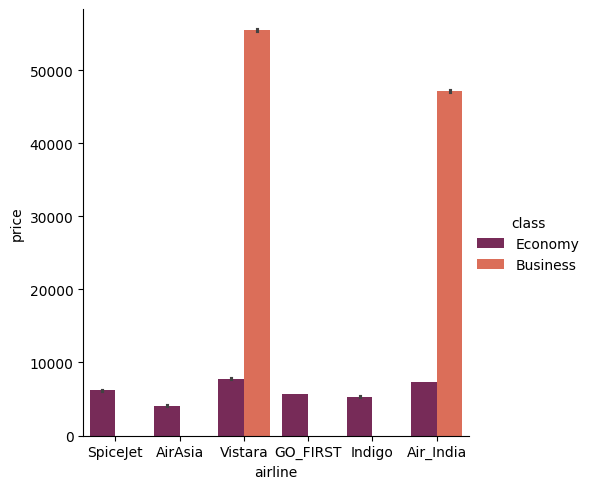

In [27]:
# Drawing the catagorical plot showing the mean tracker
sns.catplot(x='airline',y='price',data=data,kind='bar',palette='rocket',hue='class',estimator=np.mean)
plt.show()

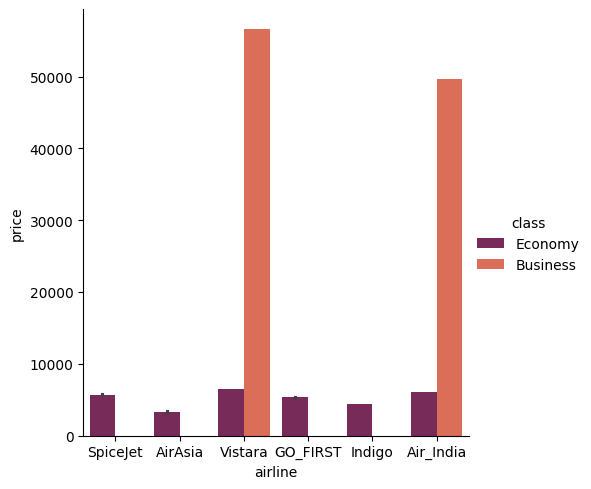

In [28]:
# Drawing the catagorical plot showing the median tracker
sns.catplot(x='airline',y='price',data=data,kind='bar',palette='rocket',hue='class',estimator=np.median)
plt.show()

In [29]:
# checking the mean ticket price based on the departure time
data.groupby('departure_time')['price'].mean()

,price
departure_time,
Afternoon,18179.203331
Early_Morning,20370.676718
Evening,21232.361894
Late_Night,9295.299387
Morning,21630.760254
Night,23062.146808


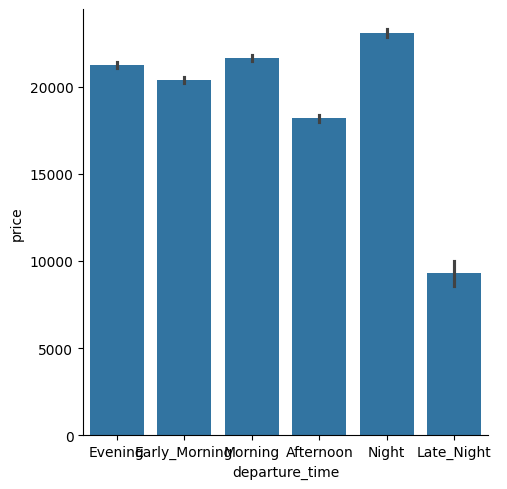

In [31]:
sns.catplot(x='departure_time',y='price',data=data,kind='bar',estimator=np.mean)
plt.show()

In [32]:
# checking the mean ticket price based on the arrival times
data.groupby('arrival_time')['price'].mean()

,price
arrival_time,
Afternoon,18494.598993
Early_Morning,14993.139521
Evening,23044.371615
Late_Night,11284.906078
Morning,22231.076098
Night,21586.758341


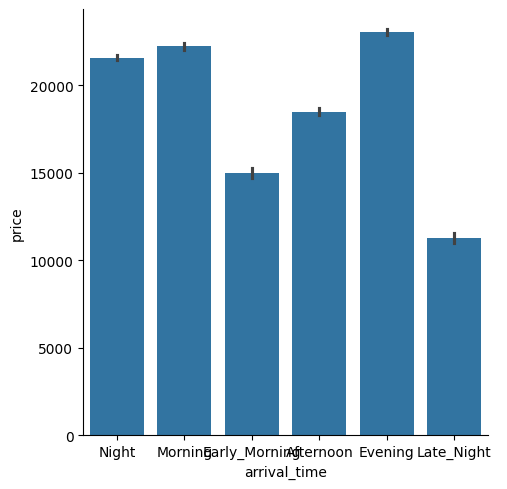

In [33]:
sns.catplot(x='arrival_time',y='price',data=data,kind='bar',estimator=np.mean)
plt.show()

In [35]:
sns.regplot(x='arrival_time',y='price',data=data,col='departure_time')
plt.show()

TypeError: regplot() got an unexpected keyword argument 'col'